Context
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\Abhishek\\Desktop\\archive (3)\\Train.csv")

In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:
df.dropna(inplace= True)
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [9]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


# Data Visvalisation

In [10]:


# plot scatter plot of Age vs. Spending_Score with cluster assignments as colors
sns.scatterplot(x='Age', y='Spending_Score', hue = 'Segmentation',  data=df)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
sns.boxplot(x='Segmentation', y='Work_Experience', data=df)
plt.show()

In [ ]:
# plot pair plot of Age, Work_Experience, and Family_Size with cluster assignments as colors
sns.pairplot(data=df, vars=['Age', 'Work_Experience', 'Family_Size'], hue='Segmentation')
plt.show()

In [ ]:
# plot histogram of Age with cluster assignments as colors
sns.histplot(data=df, x='Age', hue='Segmentation', multiple='stack')
plt.show()

In [ ]:
# Filter the data by segmentation categories
seg_a = df[df['Segmentation'] == 'A']
seg_b = df[df['Segmentation'] == 'B']
seg_c = df[df['Segmentation'] == 'C']
seg_d = df[df['Segmentation'] == 'D']

# Count the number of males and females in each segmentation category
# Count the number of males and females in each segmentation category
seg_a_counts = seg_a['Ever_Married'].value_counts()
seg_b_counts = seg_b['Ever_Married'].value_counts()
seg_c_counts = seg_c['Ever_Married'].value_counts()
seg_d_counts = seg_d['Ever_Married'].value_counts()

# Set the color of the bars
colors = ['#ff7f0e', '#1f77b4']

# Create a bar chart for each segmentation category
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].bar(seg_a_counts.index, seg_a_counts.values, color=colors)
axs[0, 0].set_title('Segment A')
axs[0, 1].bar(seg_b_counts.index, seg_b_counts.values, color=colors)
axs[0, 1].set_title('Segment B')
axs[1, 0].bar(seg_c_counts.index, seg_c_counts.values, color=colors)
axs[1, 0].set_title('Segment C')
axs[1, 1].bar(seg_d_counts.index, seg_d_counts.values, color=colors)
axs[1, 1].set_title('Segment D')
plt.show()

In [11]:
# plot violin plot of Family_Size with cluster assignments as colors
sns.violinplot(x='Segmentation', y='Family_Size', data=df)
plt.show()

NameError: name 'sns' is not defined

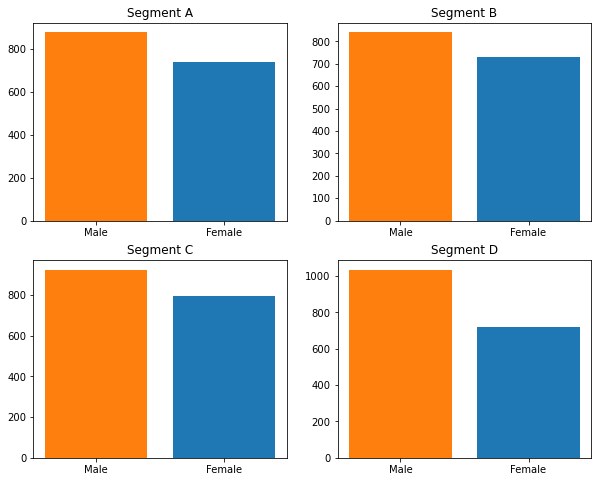

In [12]:
# Filter the data by segmentation categories
seg_a = df[df['Segmentation'] == 'A']
seg_b = df[df['Segmentation'] == 'B']
seg_c = df[df['Segmentation'] == 'C']
seg_d = df[df['Segmentation'] == 'D']

# Count the number of males and females in each segmentation category
# Count the number of males and females in each segmentation category
seg_a_counts = seg_a['Gender'].value_counts()
seg_b_counts = seg_b['Gender'].value_counts()
seg_c_counts = seg_c['Gender'].value_counts()
seg_d_counts = seg_d['Gender'].value_counts()

# Set the color of the bars
colors = ['#ff7f0e', '#1f77b4']

# Create a bar chart for each segmentation category
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].bar(seg_a_counts.index, seg_a_counts.values, color=colors)
axs[0, 0].set_title('Segment A')
axs[0, 1].bar(seg_b_counts.index, seg_b_counts.values, color=colors)
axs[0, 1].set_title('Segment B')
axs[1, 0].bar(seg_c_counts.index, seg_c_counts.values, color=colors)
axs[1, 0].set_title('Segment C')
axs[1, 1].bar(seg_d_counts.index, seg_d_counts.values, color=colors)
axs[1, 1].set_title('Segment D')
plt.show()

In [13]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


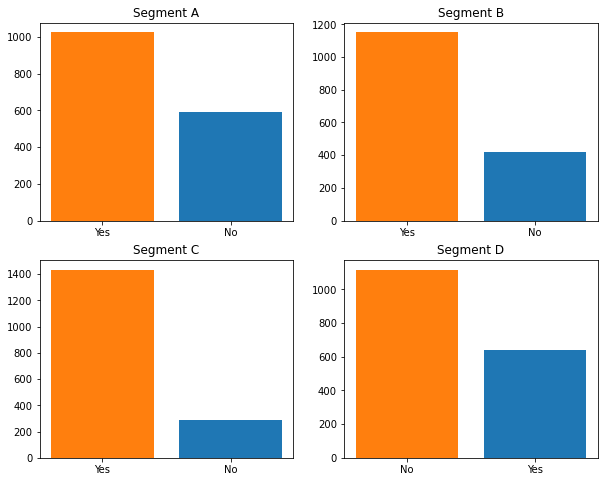

In [14]:
# Filter the data by segmentation categories
seg_a = df[df['Segmentation'] == 'A']
seg_b = df[df['Segmentation'] == 'B']
seg_c = df[df['Segmentation'] == 'C']
seg_d = df[df['Segmentation'] == 'D']

# Count the number of males and females in each segmentation category
# Count the number of males and females in each segmentation category
seg_a_counts = seg_a['Graduated'].value_counts()
seg_b_counts = seg_b['Graduated'].value_counts()
seg_c_counts = seg_c['Graduated'].value_counts()
seg_d_counts = seg_d['Graduated'].value_counts()

# Set the color of the bars
colors = ['#ff7f0e', '#1f77b4']

# Create a bar chart for each segmentation category
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].bar(seg_a_counts.index, seg_a_counts.values, color=colors)
axs[0, 0].set_title('Segment A')
axs[0, 1].bar(seg_b_counts.index, seg_b_counts.values, color=colors)
axs[0, 1].set_title('Segment B')
axs[1, 0].bar(seg_c_counts.index, seg_c_counts.values, color=colors)
axs[1, 0].set_title('Segment C')
axs[1, 1].bar(seg_d_counts.index, seg_d_counts.values, color=colors)
axs[1, 1].set_title('Segment D')
plt.show()

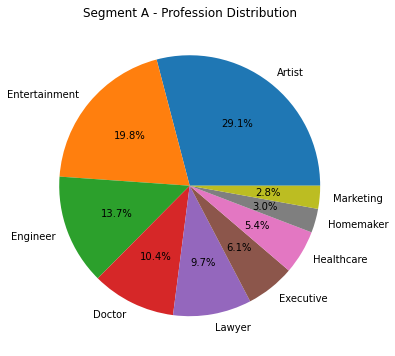

In [15]:
# Define a function to plot a pie chart for a given segmentation category
def plot_pie_chart(seg_df, seg_name):
    # Count the number of people in each profession
    prof_counts = seg_df['Profession'].value_counts()

    # Plot a pie chart for the profession distribution
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.pie(prof_counts.values, labels=prof_counts.index, autopct='%1.1f%%')
    ax.set_title(f'{seg_name} - Profession Distribution')
    plt.show()

# Filter the data by segmentation categories and plot a pie chart for each category
seg_a = df[df['Segmentation'] == 'A']
plot_pie_chart(seg_a, 'Segment A')



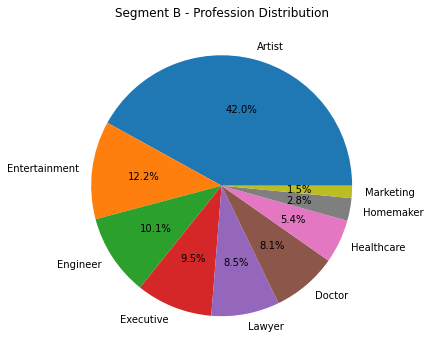

In [16]:
seg_b = df[df['Segmentation'] == 'B']
plot_pie_chart(seg_b, 'Segment B')

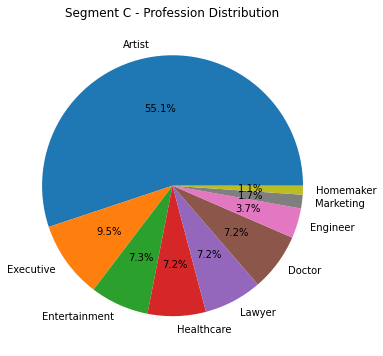

In [17]:
seg_c = df[df['Segmentation'] == 'C']
plot_pie_chart(seg_c, 'Segment C')



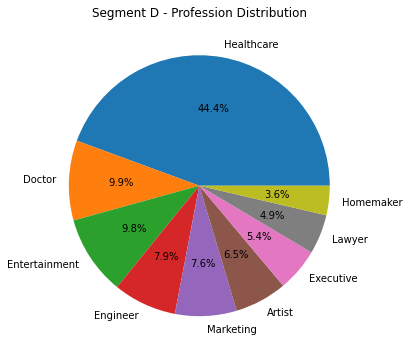

In [18]:
seg_d = df[df['Segmentation'] == 'D']
plot_pie_chart(seg_d, 'Segment D')

In [19]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


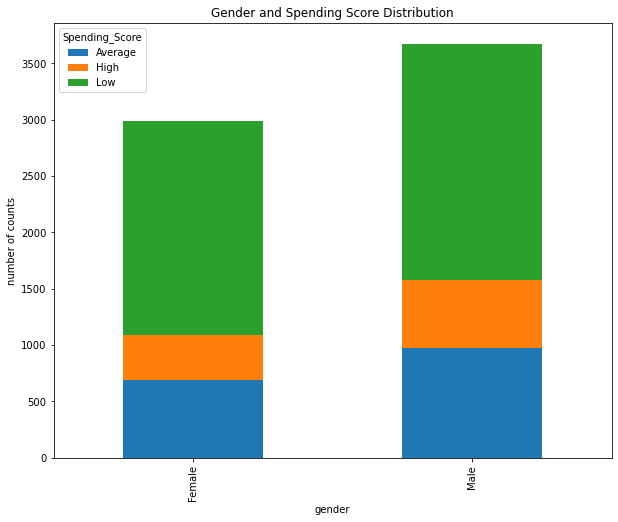

In [20]:
# Create a box plot of spending scores for each segmentation category
# Count the number of people in each segmentation category and spending score level
seg_spending_counts = df.groupby(['Gender', 'Spending_Score'])['ID'].count().unstack()

# Create a stacked bar chart for the segmentation and spending score counts
fig, ax = plt.subplots(figsize=(10, 8))
seg_spending_counts.plot(kind='bar', stacked=True, ax=ax)

# Set chart title and labels
ax.set_title('Gender and Spending Score Distribution')
ax.set_xlabel('gender')
ax.set_ylabel('number of counts')
plt.show()

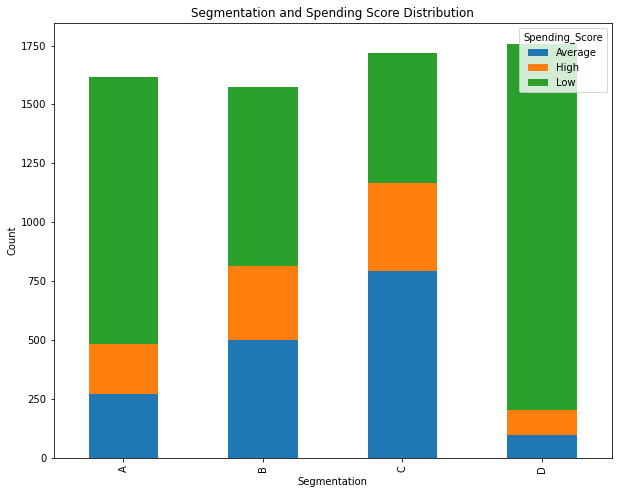

In [21]:
# Create a box plot of spending scores for each segmentation category
# Count the number of people in each segmentation category and spending score level
seg_spending_counts = df.groupby(['Segmentation', 'Spending_Score'])['ID'].count().unstack()

# Create a stacked bar chart for the segmentation and spending score counts
fig, ax = plt.subplots(figsize=(10, 8))
seg_spending_counts.plot(kind='bar', stacked=True, ax=ax)

# Set chart title and labels
ax.set_title('Segmentation and Spending Score Distribution')
ax.set_xlabel('Segmentation')
ax.set_ylabel('Count')
plt.show()

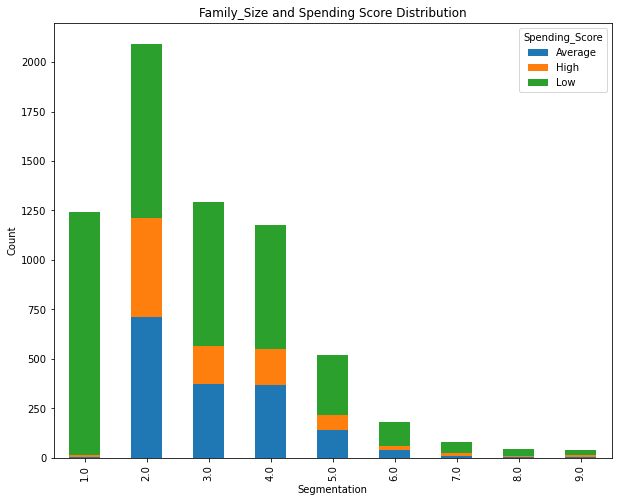

In [22]:
# Create a box plot of spending scores for each segmentation category
# Count the number of people in each segmentation category and spending score level
seg_spending_counts = df.groupby(['Family_Size', 'Spending_Score'])['ID'].count().unstack()

# Create a stacked bar chart for the segmentation and spending score counts
fig, ax = plt.subplots(figsize=(10, 8))
seg_spending_counts.plot(kind='bar', stacked=True, ax=ax)

# Set chart title and labels
ax.set_title('Family_Size and Spending Score Distribution')
ax.set_xlabel('Segmentation')
ax.set_ylabel('Count')
plt.show()

# Data Cleaning

In [23]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder



# drop the ID and Var_1 columns since they are not useful for clustering
df = df.drop(['ID', 'Var_1', 'Segmentation'], axis=1)

# convert categorical variables to numerical values using LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Ever_Married'] = le.fit_transform(df['Ever_Married'])
df['Graduated'] = le.fit_transform(df['Graduated'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Spending_Score'] = le.fit_transform(df['Spending_Score'])


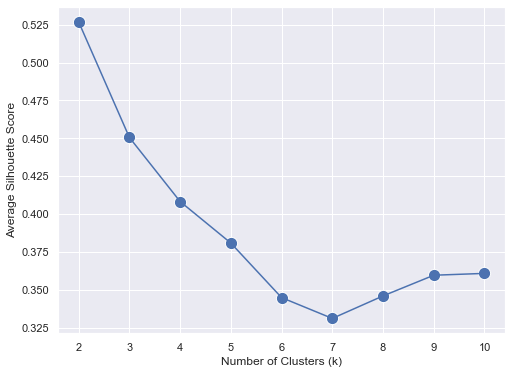

In [26]:
from sklearn.metrics import silhouette_score
import seaborn as sns
sns.set_theme()
silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df)
    silhouette.append(silhouette_score(df, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

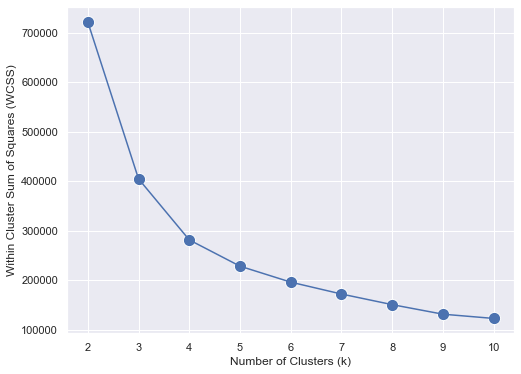

In [27]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

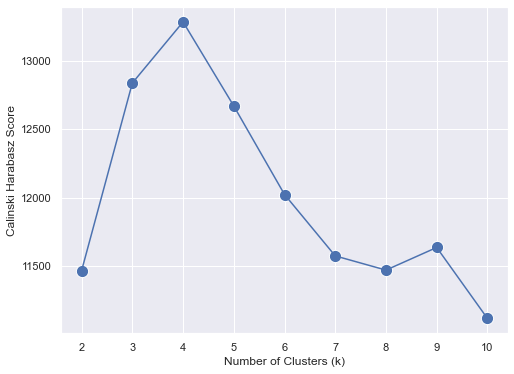

In [28]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df)
    calinski.append(calinski_harabasz_score(df, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

In [29]:
# perform k-means clustering on the data
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=1234)

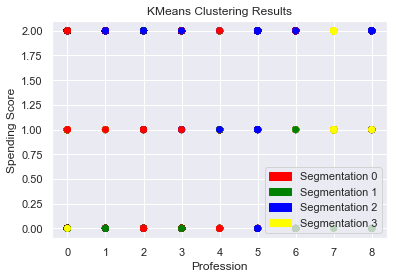

In [30]:

import matplotlib.pyplot as plt

# assign cluster labels to the data points
labels = kmeans.predict(df)

# map cluster labels to color names
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
color_labels = [colors[label] for label in labels]

# plot the data points colored by their cluster assignments
plt.scatter(df['Profession'], df['Spending_Score'], c=color_labels)
plt.xlabel('Profession')
plt.ylabel('Spending Score')
plt.title('KMeans Clustering Results')

# create a legend for the color mapping
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
legend_labels = [f'Segmentation {label}' for label in colors.keys()]
plt.legend(legend_handles, legend_labels)

plt.show()


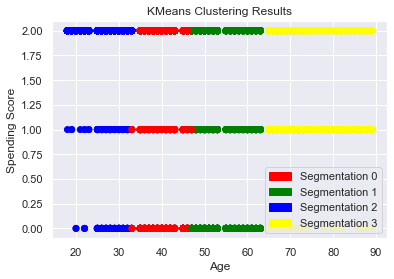

In [31]:

import matplotlib.pyplot as plt

# assign cluster labels to the data points
labels = kmeans.predict(df)

# map cluster labels to color names
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
color_labels = [colors[label] for label in labels]

# plot the data points colored by their cluster assignments
plt.scatter(df['Age'], df['Spending_Score'], c=color_labels)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('KMeans Clustering Results')

# create a legend for the color mapping
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
legend_labels = [f'Segmentation {label}' for label in colors.keys()]
plt.legend(legend_handles, legend_labels)

plt.show()






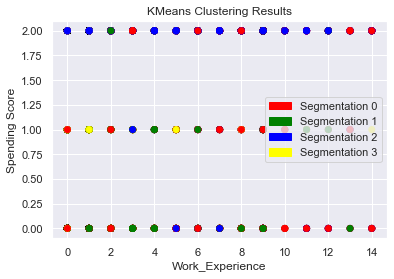

In [32]:

import matplotlib.pyplot as plt

# assign cluster labels to the data points
labels = kmeans.predict(df)

# map cluster labels to color names
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
color_labels = [colors[label] for label in labels]

# plot the data points colored by their cluster assignments
plt.scatter(df['Work_Experience'], df['Spending_Score'], c=color_labels)
plt.xlabel('Work_Experience')
plt.ylabel('Spending Score')
plt.title('KMeans Clustering Results')

# create a legend for the color mapping
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
legend_labels = [f'Segmentation {label}' for label in colors.keys()]
plt.legend(legend_handles, legend_labels)

plt.show()






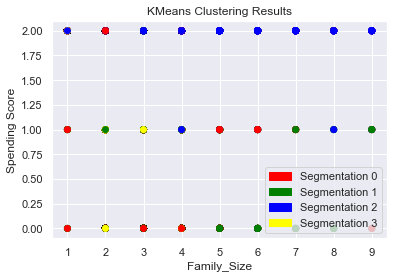

In [33]:

import matplotlib.pyplot as plt

# assign cluster labels to the data points
labels = kmeans.predict(df)

# map cluster labels to color names
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
color_labels = [colors[label] for label in labels]

# plot the data points colored by their cluster assignments
plt.scatter(df['Family_Size'], df['Spending_Score'], c=color_labels)
plt.xlabel('Family_Size')
plt.ylabel('Spending Score')
plt.title('KMeans Clustering Results')

# create a legend for the color mapping
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
legend_labels = [f'Segmentation {label}' for label in colors.keys()]
plt.legend(legend_handles, legend_labels)

plt.show()






In [34]:
# predict the cluster label for new data
new_data = [[1, 1, 20, 0, 2, 9, 2, 2]]
print(kmeans.predict(new_data))

[2]


In [54]:
import pickle

# Save the model using pickle
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)